In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {
"program1": (-0.01, 0.05),
"program2": (-0.005, 0.05),
"program3": (-0.05, 0.1),
}


names = {
  "program1": "Program 1",
"program2": "Program 2",
"program3": "Program 3"  
}

sigmas = {
  "program1": 4.,
  "program2": 4.,
  "program3":  6. 
}

program_sizes = {
  "program1": 80,
  "program2": 40,
  "program3":  10 
}

programs = ["program1", 
            "program2",
            "program3"]
  


  
### Or we can load it from data


### Discretization Parameters
N = 200_000_000
N_step = 10_000 # this should be smaller than $N/I$
I = 200
I_step = 1

mpfs = {}

for program in programs:
  arr = np.load(f"../../data/{program}_metaproduction_values_N{N}_step{N_step}_small_I{I}.npy")
  idx = np.searchsorted(np.arange(1,N,N_step), program_sizes[program])
  mpfs[program] = arr[:,idx]

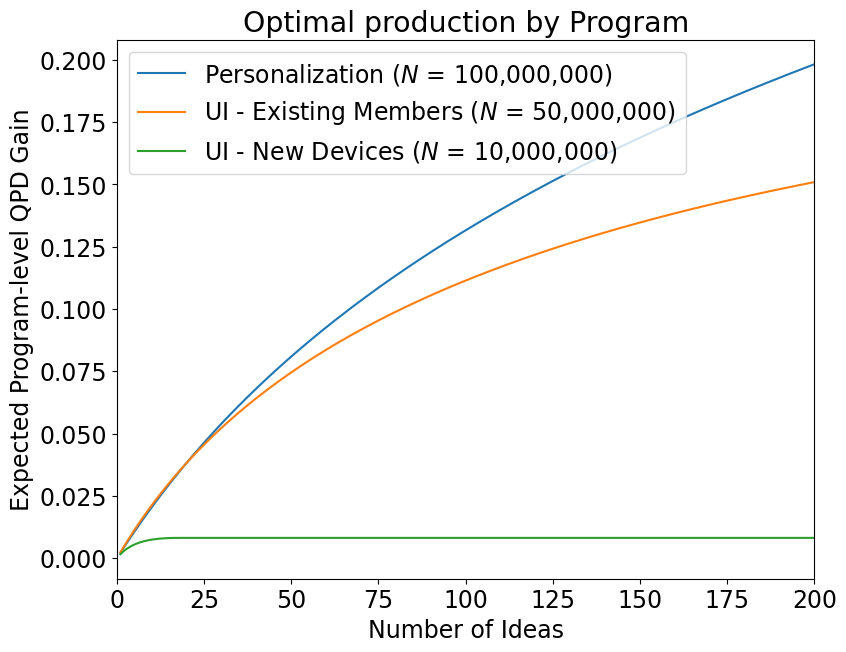

In [4]:
plt.figure(figsize = (9,7))

plt.rcParams['font.size'] = 17
I_range = np.arange(1,I+1, I_step)

for program in programs:
    plt.plot(I_range, mpfs[program], label = f"{names[program]} ($N$ = {program_sizes[program]:,})")

plt.legend()
plt.title(f"Optimal production by Program")
plt.ylabel("Expected Program-level QPD Gain")
plt.xlim(0,200)
plt.xlabel("Number of Ideas")
plt.savefig("../../figures/idea_meta_production_byprogram.pdf")
plt.show()

In [6]:
opt_vals, opt_indexes, opt_alloc = solve_multiple_program_idea_dp(programs, mpfs, I = 200, I_step = 1)

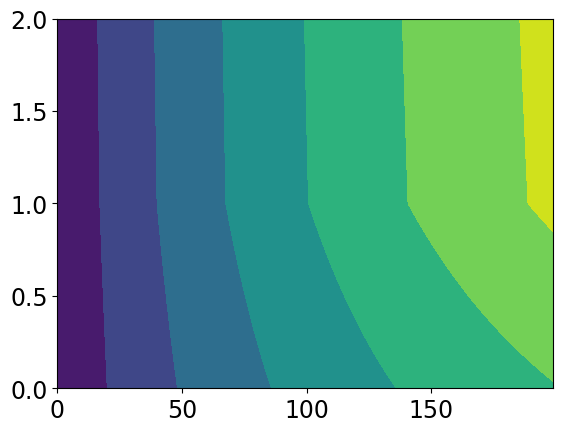

In [7]:
plt.contourf(opt_vals)

[29, 20, 0]


In [10]:
allocations = {}

for i in range(len(programs)):
    print(f"{names[programs[i]]} Allocation: {opt_alloc[i]:,}")
    allocations[programs[i]] = opt_alloc[i]

obf_names = {
  "personalization": "Program 1",
"ui_existing_members": "Program 2",
"ui_new_to_device": "Program 3"  
}

C = np.pi**np.e

Personalization Allocation: 29
UI - Existing Members Allocation: 20
UI - New Devices Allocation: 0


In [11]:
allocations

{'personalization': 29, 'ui_existing_members': 20, 'ui_new_to_device': 0}

29
20
0


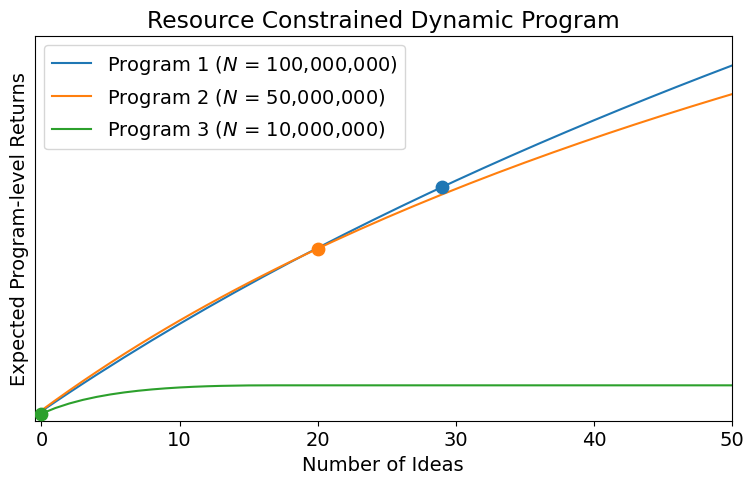

In [27]:
plt.figure(figsize = (9,5))

I_range = np.arange(0,I, I_step)


plt.rcParams['font.size'] = 14
#cmap = plt.get_cmap('magma')

for i,program in enumerate(programs):

    #color = cmap(-0.2 + i / (len(programs) - 1))  # Use the PuRd colormap
    #line, = plt.plot(I_range, C*mpfs[program], label = f"{obf_names[program]} ($N$ = {program_sizes[program]:,})", color = color)
    line, = plt.plot(I_range, C*mpfs[program], label = f"{obf_names[program]} ($N$ = {program_sizes[program]:,})")
    a = int(allocations[program])
    print(a)
    #if i == 2:
    #    plt.scatter(0,0, s = 50, color = line.get_color())
    #else:
    #    plt.scatter(a,C*mpfs[program][a], s = 50, color = line.get_color())
    plt.scatter(a,C*mpfs[program][a], s = 80, color = line.get_color(), zorder = 3)

plt.legend()
plt.title(f"Resource Constrained Dynamic Program")
plt.ylabel("Expected Program-level Returns")
plt.xlim(-0.5,50)
plt.ylim(0,2)
plt.yticks([])
plt.xlabel("Number of Ideas")
plt.savefig("../../figures/idea_meta_production_byprogram.pdf", bbox_inches = 'tight')
plt.show()